In [2]:
import pyupbit
from prophet import Prophet
import os

def predict_price(ticker="KRW-BTC", interval="minute60", count=200, period=24, freq='H'):
    df = pyupbit.get_ohlcv(ticker=ticker, interval=interval, count=count)
    df = df.reset_index()
    df['ds'] = df['index']
    df['y'] = df['close']
    data = df[['ds','y']]

    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=period, freq=freq)
    forecast = model.predict(future)
    return forecast[['trend', 'trend_lower','trend_upper']].iloc[-1]

C:\Users\piy81\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
df = pyupbit.get_ohlcv(ticker='KRW-BTC', interval='minute60', count=1000, to=None)
df = df.asfreq('H')
df

,open,high,low,close,volume,value
2022-08-31 10:00:00,27459000.0,27780000.0,27436000.0,27767000.0,245.457339,6.781373e+09
2022-08-31 11:00:00,27768000.0,27954000.0,27766000.0,27835000.0,256.434764,7.146908e+09
2022-08-31 12:00:00,27840000.0,27957000.0,27785000.0,27906000.0,181.762926,5.067005e+09
2022-08-31 13:00:00,27906000.0,27952000.0,27779000.0,27779000.0,153.693536,4.282550e+09
2022-08-31 14:00:00,27779000.0,27860000.0,27744000.0,27797000.0,178.110798,4.952733e+09
...,...,...,...,...,...,...
2022-10-11 22:00:00,27532000.0,27533000.0,27300000.0,27301000.0,305.806000,8.387033e+09
2022-10-11 23:00:00,27301000.0,27410000.0,27131000.0,27344000.0,391.873392,1.067706e+10
2022-10-12 00:00:00,27338000.0,27534000.0,27333000.0,27475000.0,115.370280,3.167129e+09
2022-10-12 01:00:00,27475000.0,27519000.0,27399000.0,27476000.0,66.737451,1.831729e+09


In [4]:
df[df.isnull().any(axis=1)]

,open,high,low,close,volume,value
2022-10-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# linear interpolation으로 결측값 채우기
df = df.interpolate(method='linear', limit_direction='forward')
df

,open,high,low,close,volume,value
2022-08-31 10:00:00,27459000.0,27780000.0,27436000.0,27767000.0,245.457339,6.781373e+09
2022-08-31 11:00:00,27768000.0,27954000.0,27766000.0,27835000.0,256.434764,7.146908e+09
2022-08-31 12:00:00,27840000.0,27957000.0,27785000.0,27906000.0,181.762926,5.067005e+09
2022-08-31 13:00:00,27906000.0,27952000.0,27779000.0,27779000.0,153.693536,4.282550e+09
2022-08-31 14:00:00,27779000.0,27860000.0,27744000.0,27797000.0,178.110798,4.952733e+09
...,...,...,...,...,...,...
2022-10-11 22:00:00,27532000.0,27533000.0,27300000.0,27301000.0,305.806000,8.387033e+09
2022-10-11 23:00:00,27301000.0,27410000.0,27131000.0,27344000.0,391.873392,1.067706e+10
2022-10-12 00:00:00,27338000.0,27534000.0,27333000.0,27475000.0,115.370280,3.167129e+09
2022-10-12 01:00:00,27475000.0,27519000.0,27399000.0,27476000.0,66.737451,1.831729e+09


In [6]:
df[df.isnull().any(axis=1)]

,open,high,low,close,volume,value


In [7]:
ma20 = df.rolling(20).mean().dropna()
ma20

,open,high,low,close,volume,value
2022-09-01 05:00:00,27691650.0,27813150.0,27593650.0,27702850.0,158.873014,4.402766e+09
2022-09-01 06:00:00,27703100.0,27813000.0,27602750.0,27702650.0,149.417879,4.141682e+09
2022-09-01 07:00:00,27701850.0,27803600.0,27592500.0,27691250.0,140.814178,3.900817e+09
2022-09-01 08:00:00,27690150.0,27786050.0,27575800.0,27672450.0,138.607620,3.836752e+09
2022-09-01 09:00:00,27670900.0,27770950.0,27557400.0,27664200.0,141.999305,3.927802e+09
...,...,...,...,...,...,...
2022-10-11 22:00:00,27432650.0,27491350.0,27366900.0,27414000.0,175.887655,4.821832e+09
2022-10-11 23:00:00,27414750.0,27478400.0,27348450.0,27404650.0,193.576591,5.303135e+09
2022-10-12 00:00:00,27405100.0,27476350.0,27340100.0,27400950.0,197.514875,5.411109e+09
2022-10-12 01:00:00,27402400.0,27473650.0,27334600.0,27397300.0,196.596586,5.385522e+09


In [20]:
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-08-25 07:00:00,29207000.0
1,2022-08-25 08:00:00,29104000.0
2,2022-08-25 09:00:00,29180000.0
3,2022-08-25 10:00:00,29235000.0
4,2022-08-25 11:00:00,29250000.0
...,...,...
996,2022-10-05 19:00:00,28753000.0
997,2022-10-05 20:00:00,28662000.0
998,2022-10-05 21:00:00,28674000.0
999,2022-10-05 22:00:00,28535000.0


In [23]:
ma20 = data.rolling(20).mean()
ma20['ds'] = data['ds']
ma20

C:\Users\piy81\AppData\Local\Temp\ipykernel_20680\2911513430.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  ma20 = data.rolling(20).mean()


,y,ds
0,NaN,2022-08-25 07:00:00
1,NaN,2022-08-25 08:00:00
2,NaN,2022-08-25 09:00:00
3,NaN,2022-08-25 10:00:00
4,NaN,2022-08-25 11:00:00
...,...,...
996,28799800.0,2022-10-05 19:00:00
997,28796500.0,2022-10-05 20:00:00
998,28800300.0,2022-10-05 21:00:00
999,28793550.0,2022-10-05 22:00:00


In [25]:
ma60 = data.rolling(60).mean()
ma60['ds'] = data['ds']
ma60

C:\Users\piy81\AppData\Local\Temp\ipykernel_20680\921596875.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  ma60 = data.rolling(60).mean()


,y,ds
0,NaN,2022-08-25 07:00:00
1,NaN,2022-08-25 08:00:00
2,NaN,2022-08-25 09:00:00
3,NaN,2022-08-25 10:00:00
4,NaN,2022-08-25 11:00:00
...,...,...
996,2.836883e+07,2022-10-05 19:00:00
997,2.838502e+07,2022-10-05 20:00:00
998,2.840097e+07,2022-10-05 21:00:00
999,2.841238e+07,2022-10-05 22:00:00


In [27]:
ma120 = data.rolling(120).mean()
ma120['ds'] = data['ds']
ma120

C:\Users\piy81\AppData\Local\Temp\ipykernel_20680\2693405805.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  ma120 = data.rolling(120).mean()


,y,ds
0,NaN,2022-08-25 07:00:00
1,NaN,2022-08-25 08:00:00
2,NaN,2022-08-25 09:00:00
3,NaN,2022-08-25 10:00:00
4,NaN,2022-08-25 11:00:00
...,...,...
996,2.813246e+07,2022-10-05 19:00:00
997,2.813880e+07,2022-10-05 20:00:00
998,2.814627e+07,2022-10-05 21:00:00
999,2.815115e+07,2022-10-05 22:00:00


In [29]:
bollinger_upper = data.rolling(20).mean() + data.rolling(20).std() * 2
bollinger_lower = data.rolling(20).mean() - data.rolling(20).std() * 2
bollinger_upper['ds'] = data['ds']
bollinger_lower['ds'] = data['ds']

C:\Users\piy81\AppData\Local\Temp\ipykernel_20680\303704335.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  bollinger_upper = data.rolling(20).mean() + data.rolling(20).std() * 2
C:\Users\piy81\AppData\Local\Temp\ipykernel_20680\303704335.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ds'], dtype='object')
  bollinger_lower = data.rolling(20).mean() - data.rolling(20).std() * 2


In [30]:
bollinger_upper

,y,ds
0,NaN,2022-08-25 07:00:00
1,NaN,2022-08-25 08:00:00
2,NaN,2022-08-25 09:00:00
3,NaN,2022-08-25 10:00:00
4,NaN,2022-08-25 11:00:00
...,...,...
996,2.899653e+07,2022-10-05 19:00:00
997,2.900039e+07,2022-10-05 20:00:00
998,2.899102e+07,2022-10-05 21:00:00
999,2.901132e+07,2022-10-05 22:00:00


In [31]:
bollinger_lower

,y,ds
0,NaN,2022-08-25 07:00:00
1,NaN,2022-08-25 08:00:00
2,NaN,2022-08-25 09:00:00
3,NaN,2022-08-25 10:00:00
4,NaN,2022-08-25 11:00:00
...,...,...
996,2.860307e+07,2022-10-05 19:00:00
997,2.859261e+07,2022-10-05 20:00:00
998,2.860958e+07,2022-10-05 21:00:00
999,2.857578e+07,2022-10-05 22:00:00


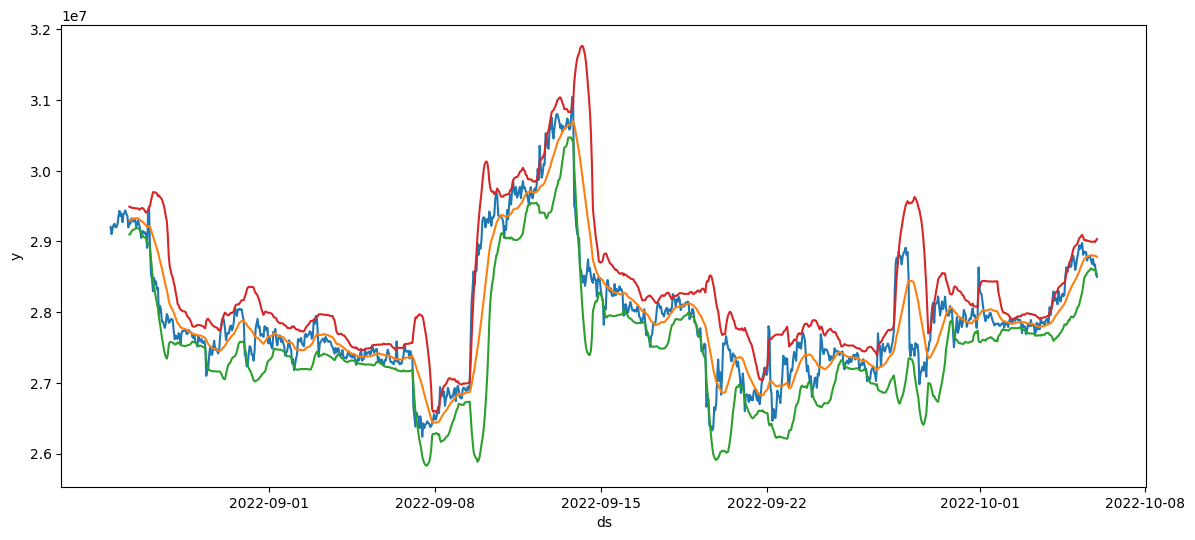

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.lineplot(data=data, x='ds', y='y')
sns.lineplot(data=ma20, x='ds', y='y')
sns.lineplot(data=ma60, x='ds', y='y')
sns.lineplot(data=ma120, x='ds', y='y')
sns.lineplot(data=bollinger_lower, x='ds', y='y')
sns.lineplot(data=bollinger_upper, x='ds', y='y')
plt.show()

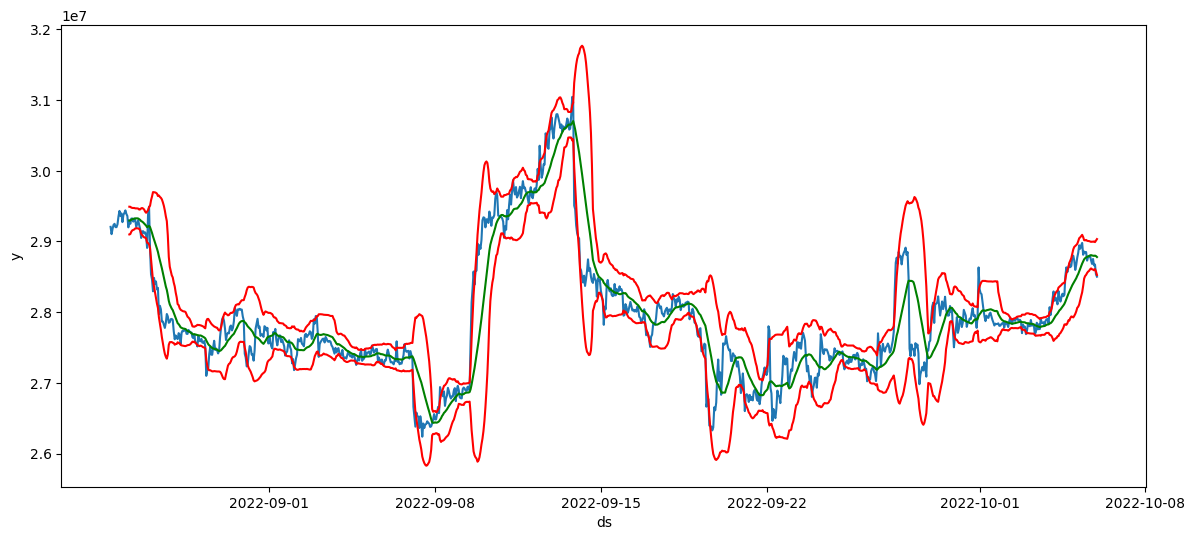

In [34]:
plt.figure(figsize=(14,6))
sns.lineplot(data=data, x='ds', y='y')
sns.lineplot(data=ma20, x='ds', y='y', color='green')
sns.lineplot(data=bollinger_lower, x='ds', y='y', color='red')
sns.lineplot(data=bollinger_upper, x='ds', y='y', color='red')
plt.show()

In [41]:
mask = (data['y'] > bollinger_upper['y']) | (data['y'] < bollinger_lower['y'])
data[mask]

,ds,y
31,2022-08-26 14:00:00,29050000.0
37,2022-08-26 20:00:00,28909000.0
39,2022-08-26 22:00:00,29493000.0
40,2022-08-26 23:00:00,28886000.0
41,2022-08-27 00:00:00,28534000.0
...,...,...
956,2022-10-04 03:00:00,28293000.0
968,2022-10-04 15:00:00,28516000.0
969,2022-10-04 16:00:00,28634000.0
999,2022-10-05 22:00:00,28535000.0


In [42]:
prob = data[mask].count().iloc[1] * 100 / data.count().iloc[1]
print("Probability of which coin price is out of bollinger band is {}%.".format(prob))

Probability of which coin price is out of bollinger band is 9.89010989010989%.


In [34]:
df['open'] < 0

0       False
1       False
2       False
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: open, Length: 1001, dtype: bool

In [39]:
# sign decision
(-1) ** (df['change'] < 0)

0      -1
1      -1
2      -1
3       1
4       1
       ..
996     1
997     1
998     1
999    -1
1000   -1
Name: change, Length: 1001, dtype: int32

In [38]:
df['change'] = (df['close'] - df['open']) / df['open']
df['amplitude'] = ((-1) ** (df['change'] < 0)) * (df['high'] - df['low']) / df['low']
df

,index,open,high,low,close,volume,value,ds,y,change,amplitude
0,2022-08-24 09:00:00,29287000.0,29350000.0,29111000.0,29191000.0,215.576371,6.299721e+09,2022-08-24 09:00:00,29191000.0,-0.003278,-0.008210
1,2022-08-24 10:00:00,29191000.0,29221000.0,28950000.0,29059000.0,226.579249,6.589174e+09,2022-08-24 10:00:00,29059000.0,-0.004522,-0.009361
2,2022-08-24 11:00:00,29050000.0,29197000.0,28951000.0,29021000.0,145.553759,4.229644e+09,2022-08-24 11:00:00,29021000.0,-0.000998,-0.008497
3,2022-08-24 12:00:00,29021000.0,29120000.0,29000000.0,29100000.0,100.083765,2.908928e+09,2022-08-24 12:00:00,29100000.0,0.002722,0.004138
4,2022-08-24 13:00:00,29100000.0,29150000.0,29028000.0,29138000.0,96.200873,2.798447e+09,2022-08-24 13:00:00,29138000.0,0.001306,0.004203
...,...,...,...,...,...,...,...,...,...,...,...
996,2022-10-04 21:00:00,28638000.0,28667000.0,28574000.0,28654000.0,235.113461,6.729561e+09,2022-10-04 21:00:00,28654000.0,0.000559,0.003255
997,2022-10-04 22:00:00,28668000.0,28845000.0,28620000.0,28779000.0,422.068369,1.212516e+10,2022-10-04 22:00:00,28779000.0,0.003872,0.007862
998,2022-10-04 23:00:00,28779000.0,28950000.0,28721000.0,28799000.0,493.140650,1.421999e+10,2022-10-04 23:00:00,28799000.0,0.000695,0.007973
999,2022-10-05 00:00:00,28788000.0,28800000.0,28701000.0,28728000.0,151.640638,4.359637e+09,2022-10-05 00:00:00,28728000.0,-0.002084,-0.003449


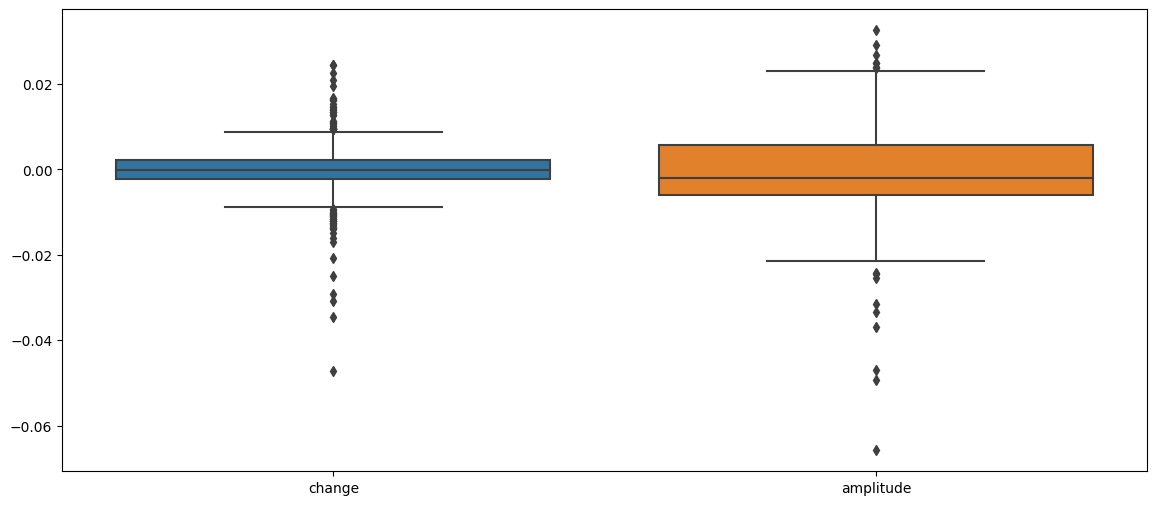

In [43]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df[['change', 'amplitude']])
plt.show()

In [44]:
data = df[['ds', 'y', 'change', 'amplitude']]
data = data.set_index('ds').asfreq('H')
data

,y,change,amplitude
ds,,,
2022-08-24 09:00:00,29191000.0,-0.003278,-0.008210
2022-08-24 10:00:00,29059000.0,-0.004522,-0.009361
2022-08-24 11:00:00,29021000.0,-0.000998,-0.008497
2022-08-24 12:00:00,29100000.0,0.002722,0.004138
2022-08-24 13:00:00,29138000.0,0.001306,0.004203
...,...,...,...
2022-10-04 21:00:00,28654000.0,0.000559,0.003255
2022-10-04 22:00:00,28779000.0,0.003872,0.007862
2022-10-04 23:00:00,28799000.0,0.000695,0.007973


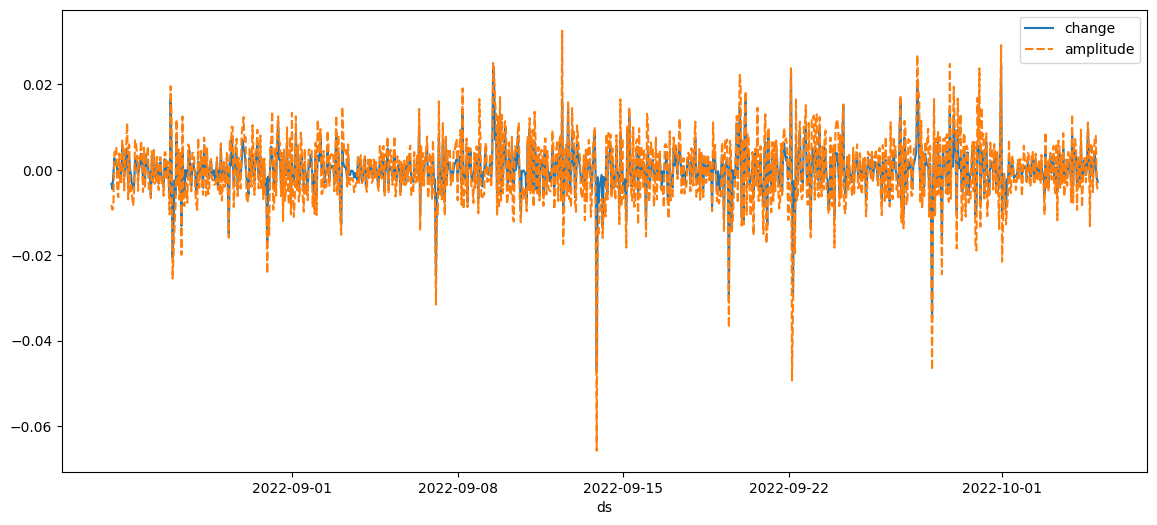

In [47]:
plt.figure(figsize=(14,6))
sns.lineplot(data=data[['change', 'amplitude']])
plt.show()

In [39]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [21]:
forecast = forecast.set_index('ds')

In [23]:
forecast = forecast.asfreq('H')

In [1]:
forecast.columns

NameError: name 'forecast' is not defined

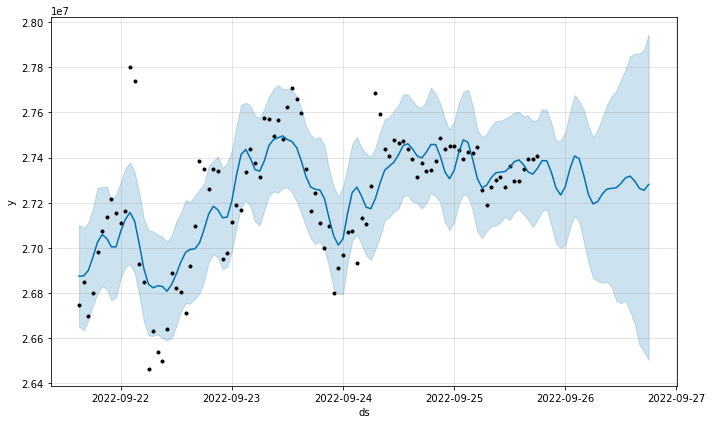

In [40]:
fig1 = model.plot(forecast)

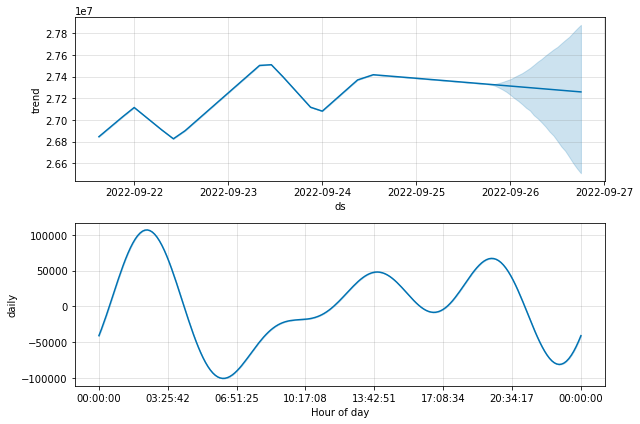

In [41]:
fig2 = model.plot_components(forecast)

In [43]:
import numpy as np

def noise_cleaning(df):
    pass

def find_peak(df):
    size = len(df)
    result = []
    for i in range(1,size-1):
        if (df[i] - df[i-1]) * (df[i+1] - df[i]) < 0:
            result.append(df[i])
    return result


print(type(data['y']))
print(data['y'][0])

<class 'pandas.core.series.Series'>
26746000.0


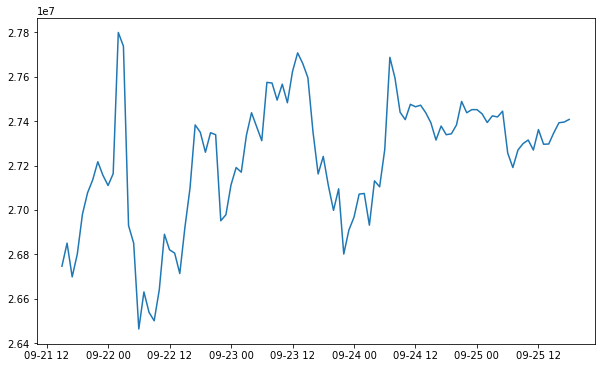

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='w', figsize=(10, 6))
plt.plot(data.ds, data.y)

In [2]:
import pyupbit
import requests

url = "https://api.upbit.com/v1/trades/ticks?market=KRW-BTC&count=10000000"

headers = {"accept": "application/json"}

res = requests.get(url, headers=headers)

json_data = json.loads(res.text)
print(json_data)

[{'market': 'KRW-BTC', 'trade_date_utc': '2022-09-25', 'trade_time_utc': '15:33:13', 'timestamp': 1664119993000, 'trade_price': 27281000.0, 'trade_volume': 0.01228682, 'prev_closing_price': 27270000.0, 'change_price': 11000.0, 'ask_bid': 'BID', 'sequential_id': 1664119993000000}, {'market': 'KRW-BTC', 'trade_date_utc': '2022-09-25', 'trade_time_utc': '15:33:12', 'timestamp': 1664119992000, 'trade_price': 27281000.0, 'trade_volume': 0.00733111, 'prev_closing_price': 27270000.0, 'change_price': 11000.0, 'ask_bid': 'BID', 'sequential_id': 1664119992000003}, {'market': 'KRW-BTC', 'trade_date_utc': '2022-09-25', 'trade_time_utc': '15:33:12', 'timestamp': 1664119992000, 'trade_price': 27281000.0, 'trade_volume': 0.00555834, 'prev_closing_price': 27270000.0, 'change_price': 11000.0, 'ask_bid': 'BID', 'sequential_id': 1664119992000002}, {'market': 'KRW-BTC', 'trade_date_utc': '2022-09-25', 'trade_time_utc': '15:33:12', 'timestamp': 1664119992000, 'trade_price': 27281000.0, 'trade_volume': 0.00

In [3]:
import pandas as pd
ticks = pd.DataFrame(json_data)
ticks

,market,trade_date_utc,trade_time_utc,timestamp,trade_price,trade_volume,prev_closing_price,change_price,ask_bid,sequential_id
0,KRW-BTC,2022-09-25,15:33:13,1664119993000,27281000.0,0.012287,27270000.0,11000.0,BID,1664119993000000
1,KRW-BTC,2022-09-25,15:33:12,1664119992000,27281000.0,0.007331,27270000.0,11000.0,BID,1664119992000003
2,KRW-BTC,2022-09-25,15:33:12,1664119992000,27281000.0,0.005558,27270000.0,11000.0,BID,1664119992000002
3,KRW-BTC,2022-09-25,15:33:12,1664119992000,27281000.0,0.005438,27270000.0,11000.0,BID,1664119992000001
4,KRW-BTC,2022-09-25,15:33:12,1664119992000,27281000.0,0.003875,27270000.0,11000.0,BID,1664119992000000
...,...,...,...,...,...,...,...,...,...,...
495,KRW-BTC,2022-09-25,15:22:21,1664119341000,27280000.0,0.001102,27270000.0,10000.0,BID,1664119341000001
496,KRW-BTC,2022-09-25,15:22:21,1664119341000,27280000.0,0.000844,27270000.0,10000.0,BID,1664119341000000
497,KRW-BTC,2022-09-25,15:22:19,1664119339000,27281000.0,0.013897,27270000.0,11000.0,ASK,1664119339000002
498,KRW-BTC,2022-09-25,15:22:19,1664119339000,27280000.0,0.014565,27270000.0,10000.0,ASK,1664119339000001


In [12]:
last = ticks['timestamp'].iloc[200]
last_id = ticks['sequential_id'].iloc[200]
print(last_id)

1664119596000000


In [11]:
ticks[ticks['sequential_id'] > last_id]

,market,trade_date_utc,trade_time_utc,timestamp,trade_price,trade_volume,prev_closing_price,change_price,ask_bid,sequential_id
0,KRW-BTC,2022-09-25,15:33:13,1664119993000,27281000.0,0.012287,27270000.0,11000.0,BID,1664119993000000
1,KRW-BTC,2022-09-25,15:33:12,1664119992000,27281000.0,0.007331,27270000.0,11000.0,BID,1664119992000003
2,KRW-BTC,2022-09-25,15:33:12,1664119992000,27281000.0,0.005558,27270000.0,11000.0,BID,1664119992000002
3,KRW-BTC,2022-09-25,15:33:12,1664119992000,27281000.0,0.005438,27270000.0,11000.0,BID,1664119992000001
4,KRW-BTC,2022-09-25,15:33:12,1664119992000,27281000.0,0.003875,27270000.0,11000.0,BID,1664119992000000
...,...,...,...,...,...,...,...,...,...,...
195,KRW-BTC,2022-09-25,15:26:51,1664119611000,27297000.0,0.001832,27270000.0,27000.0,ASK,1664119611000000
196,KRW-BTC,2022-09-25,15:26:47,1664119607000,27307000.0,0.006700,27270000.0,37000.0,BID,1664119607000000
197,KRW-BTC,2022-09-25,15:26:46,1664119606000,27297000.0,0.010446,27270000.0,27000.0,ASK,1664119606000000
198,KRW-BTC,2022-09-25,15:26:45,1664119605000,27307000.0,0.073244,27270000.0,37000.0,BID,1664119605000000


In [ ]:
def MA(data: pd.DataFrame, interval: int=10) -> pd.DataFrame:
    return data.rolling(interval).mean()